In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv(
    "../../data/processed/online_retail_2009_2010_with_clusters.csv", 
    parse_dates=["LastInvoiceDate"]
)

In [18]:
df

,CustomerID,LastInvoiceDate,Frequency,Monetary,Recency,Cluster
0,12346.0,2010-06-28 13:53:00,11,372.86,165,3
1,12347.0,2010-12-07 14:57:00,2,1323.32,3,0
2,12348.0,2010-09-27 14:59:00,1,222.16,74,1
3,12349.0,2010-10-28 08:23:00,3,2671.14,43,0
4,12351.0,2010-11-29 15:23:00,1,300.93,11,1
...,...,...,...,...,...,...
3823,18283.0,2010-11-22 15:30:00,6,641.77,18,0
3824,18284.0,2010-10-04 11:33:00,1,461.68,67,1
3825,18285.0,2010-02-17 10:24:00,1,427.00,296,2
3826,18286.0,2010-08-20 11:57:00,2,1296.43,112,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       3828 non-null   float64       
 1   LastInvoiceDate  3828 non-null   datetime64[ns]
 2   Frequency        3828 non-null   int64         
 3   Monetary         3828 non-null   float64       
 4   Recency          3828 non-null   int64         
 5   Cluster          3828 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 179.6 KB


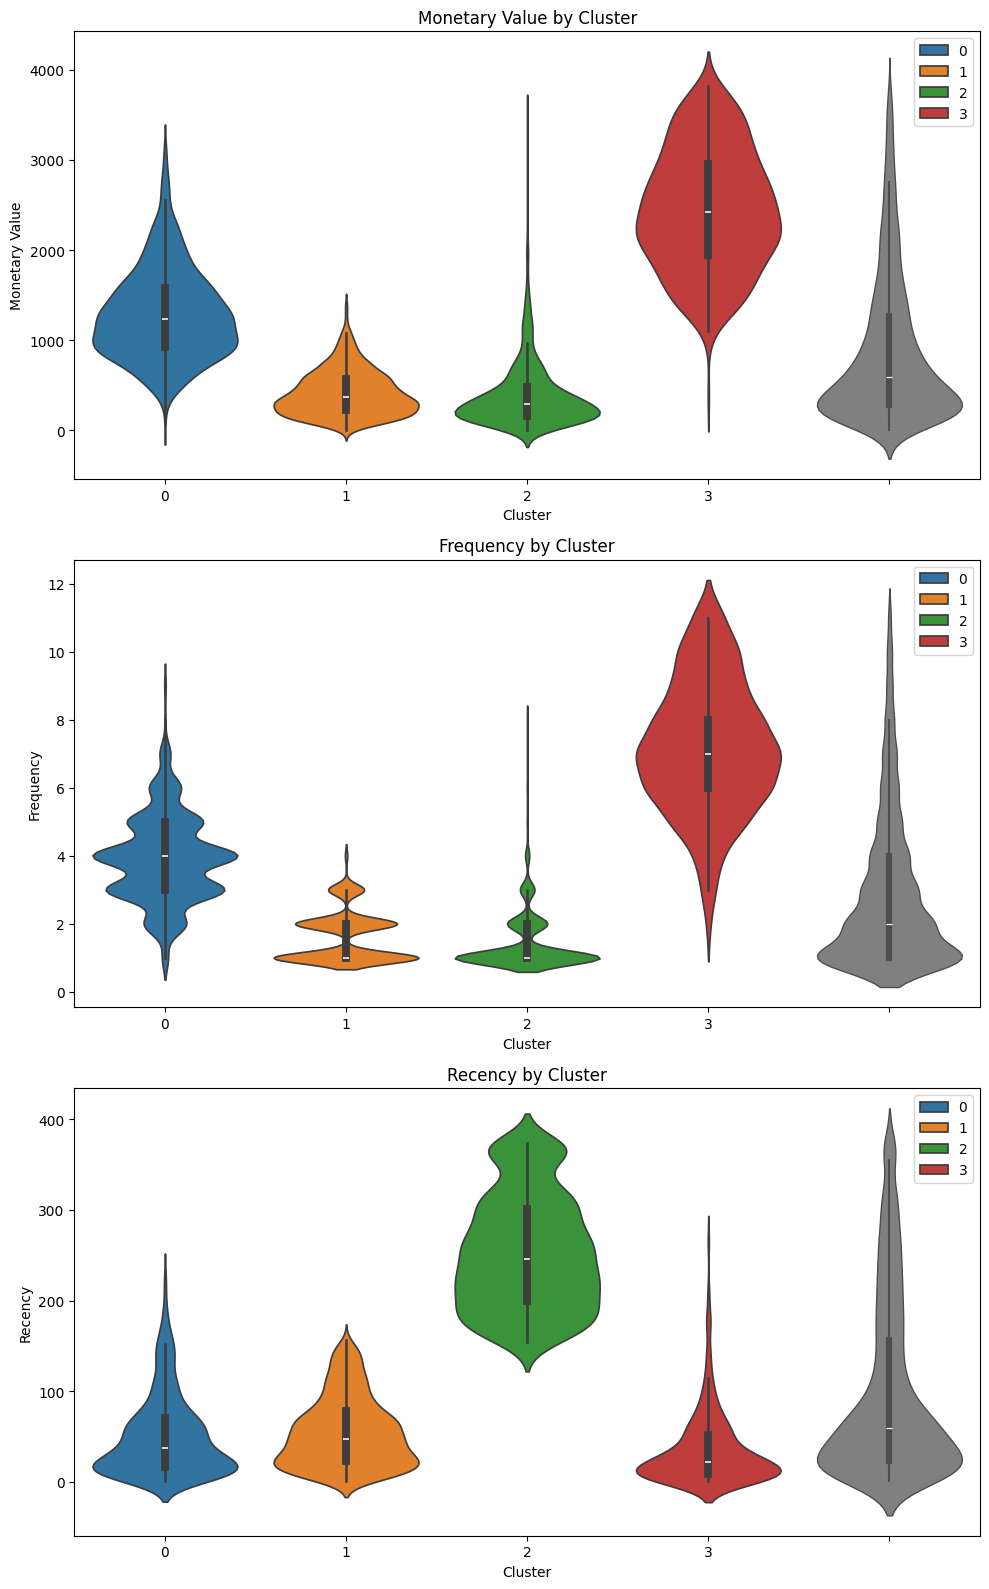

In [ ]:
cluster_colors = {
    0: "#1f77b4",  # Blue
    1: "#ff7f0e",  # Orange
    2: "#2ca02c",  # Green
    3: "#d62728",  # Red
}

plt.figure(figsize=(10, 16))

plt.subplot(3, 1, 1)
sns.violinplot(
    x=df["Cluster"], y=df["Monetary"], palette=cluster_colors, hue=df["Cluster"]
)
sns.violinplot(y=df["Monetary"], color="gray", linewidth=1.0)
plt.title("Monetary Value by Cluster")
plt.ylabel("Monetary Value")

plt.subplot(3, 1, 2)
sns.violinplot(
    x=df["Cluster"], y=df["Frequency"], palette=cluster_colors, hue=df["Cluster"]
)
sns.violinplot(y=df["Frequency"], color="gray", linewidth=1.0)
plt.title("Frequency by Cluster")
plt.ylabel("Frequency")

plt.subplot(3, 1, 3)
sns.violinplot(
    x=df["Cluster"], y=df["Recency"], palette=cluster_colors, hue=df["Cluster"]
)
sns.violinplot(y=df["Recency"], color="gray", linewidth=1.0)
plt.title("Recency by Cluster")
plt.ylabel("Recency")

plt.tight_layout()
plt.show()

**1. Cluster 0 (Blue): "Retain"**
- Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
- Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

**2. Cluster 1 (Orange): "Re-Engage"**
- Rationale: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
- Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

**3. Cluster 2 (Green): "Nurture"**
- Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
- Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

**4. Cluster 3 (Red): "Reward"**
- Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
- Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

**Summary of Cluster Names:**
- Cluster 0 (Blue): "Retain"
- Cluster 1 (Orange): "Re-Engage"
- Cluster 2 (Green): "Nurture"
- Cluster 3 (Red): "Reward"

In [23]:
rfm = pd.read_csv(
    "../../data/processed/rfm_metrics.csv", 
    parse_dates=["LastInvoiceDate"]
)

In [24]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       4312 non-null   float64       
 1   LastInvoiceDate  4312 non-null   datetime64[ns]
 2   Frequency        4312 non-null   int64         
 3   Monetary         4312 non-null   float64       
 4   Recency          4312 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 168.6 KB


In [25]:
# Function to compute IQR bounds
def get_iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Get IQR bounds from the original data (consistent with feature_engineering.py)
lower_freq, upper_freq = get_iqr_bounds(rfm["Frequency"])
lower_mon, upper_mon = get_iqr_bounds(rfm["Monetary"])

# Identify outliers in the original data
freq_outlier_mask = (rfm["Frequency"] < lower_freq) | (rfm["Frequency"] > upper_freq)
mon_outlier_mask = (rfm["Monetary"] < lower_mon) | (rfm["Monetary"] > upper_mon)

# Categorize outliers
only_freq_outliers = rfm[freq_outlier_mask & ~mon_outlier_mask].copy()
only_mon_outliers = rfm[mon_outlier_mask & ~freq_outlier_mask].copy()
both_outliers = rfm[freq_outlier_mask & mon_outlier_mask].copy()

# Assign cluster labels to distinguish outlier types
only_freq_outliers["Cluster"] = -2  # Only Frequency outliers
only_mon_outliers["Cluster"] = -1   # Only Monetary outliers
both_outliers["Cluster"] = -3       # Both Frequency and Monetary outliers

# Combine all outliers into one DataFrame
outlier_df = pd.concat([only_freq_outliers, only_mon_outliers, both_outliers])

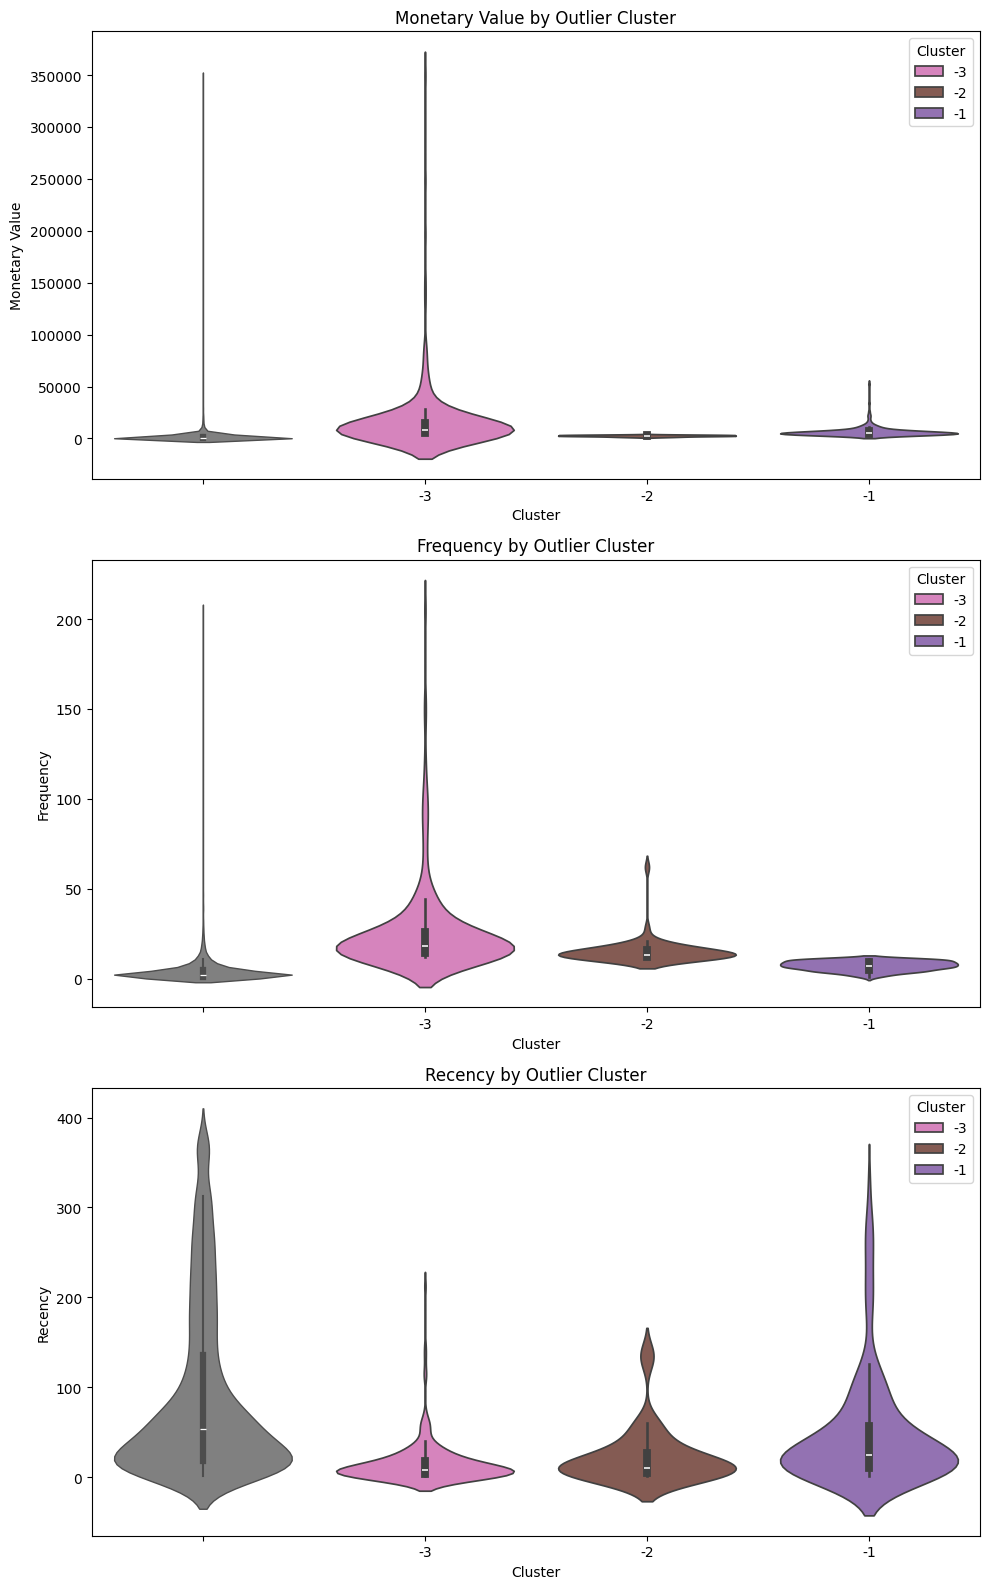

In [ ]:
# Define colors for each outlier cluster
cluster_colors = {
    -1: "#9467bd",  # Only Monetary outliers
    -2: "#8c564b",  # Only Frequency outliers
    -3: "#e377c2"   # Both outliers
}

# Plot violin plots
plt.figure(figsize=(10, 16))

# Monetary
plt.subplot(3, 1, 1)
sns.violinplot(y=rfm["Monetary"], color="gray", linewidth=1.0)  # Overall distribution
sns.violinplot(
    x="Cluster", y="Monetary", data=outlier_df,
    palette=cluster_colors, hue="Cluster"
)
plt.title("Monetary Value by Outlier Cluster")
plt.ylabel("Monetary Value")

# Frequency
plt.subplot(3, 1, 2)
sns.violinplot(y=rfm["Frequency"], color="gray", linewidth=1.0)
sns.violinplot(
    x="Cluster", y="Frequency", data=outlier_df,
    palette=cluster_colors, hue="Cluster"
)
plt.title("Frequency by Outlier Cluster")
plt.ylabel("Frequency")

# Recency
plt.subplot(3, 1, 3)
sns.violinplot(y=rfm["Recency"], color="gray", linewidth=1.0)
sns.violinplot(
    x="Cluster", y="Recency", data=outlier_df,
    palette=cluster_colors, hue="Cluster"
)
plt.title("Recency by Outlier Cluster")
plt.ylabel("Recency")

plt.tight_layout()
plt.show()

- Cluster -1 (Monetary Outliers) PAMPER: Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent. Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

- Cluster -2 (Frequency Outliers) UPSELL: Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities. Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

- Cluster -3 (Monetary & Frequency Outliers) DELIGHT: Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention. Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [29]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [30]:
# Combine non-outliers and outliers into a full DataFrame
full_clustering_df = pd.concat([df, outlier_df])
full_clustering_df

,CustomerID,LastInvoiceDate,Frequency,Monetary,Recency,Cluster
0,12346.0,2010-06-28 13:53:00,11,372.86,165,3
1,12347.0,2010-12-07 14:57:00,2,1323.32,3,0
2,12348.0,2010-09-27 14:59:00,1,222.16,74,1
3,12349.0,2010-10-28 08:23:00,3,2671.14,43,0
4,12351.0,2010-11-29 15:23:00,1,300.93,11,1
...,...,...,...,...,...,...
4262,18223.0,2010-11-17 12:20:00,12,7516.31,23,-3
4263,18225.0,2010-12-09 15:46:00,15,7545.14,1,-3
4264,18226.0,2010-11-26 15:51:00,15,6650.83,14,-3
4268,18231.0,2010-10-29 14:17:00,23,4797.70,42,-3


In [31]:
# Map cluster numbers to descriptive labels
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)
full_clustering_df

,CustomerID,LastInvoiceDate,Frequency,Monetary,Recency,Cluster,ClusterLabel
0,12346.0,2010-06-28 13:53:00,11,372.86,165,3,REWARD
1,12347.0,2010-12-07 14:57:00,2,1323.32,3,0,RETAIN
2,12348.0,2010-09-27 14:59:00,1,222.16,74,1,RE-ENGAGE
3,12349.0,2010-10-28 08:23:00,3,2671.14,43,0,RETAIN
4,12351.0,2010-11-29 15:23:00,1,300.93,11,1,RE-ENGAGE
...,...,...,...,...,...,...,...
4262,18223.0,2010-11-17 12:20:00,12,7516.31,23,-3,DELIGHT
4263,18225.0,2010-12-09 15:46:00,15,7545.14,1,-3,DELIGHT
4264,18226.0,2010-11-26 15:51:00,15,6650.83,14,-3,DELIGHT
4268,18231.0,2010-10-29 14:17:00,23,4797.70,42,-3,DELIGHT


In [32]:
# Calculate Monetary Value per 100 pounds
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["Monetary"] / 100.00

# Compute cluster counts and feature means
cluster_counts = full_clustering_df["ClusterLabel"].value_counts()
feature_means = full_clustering_df.groupby("ClusterLabel")[["Recency", "Frequency", "MonetaryValue per 100 pounds"]].mean()

C:\Users\sebas\AppData\Local\Temp\ipykernel_8676\2283930300.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")


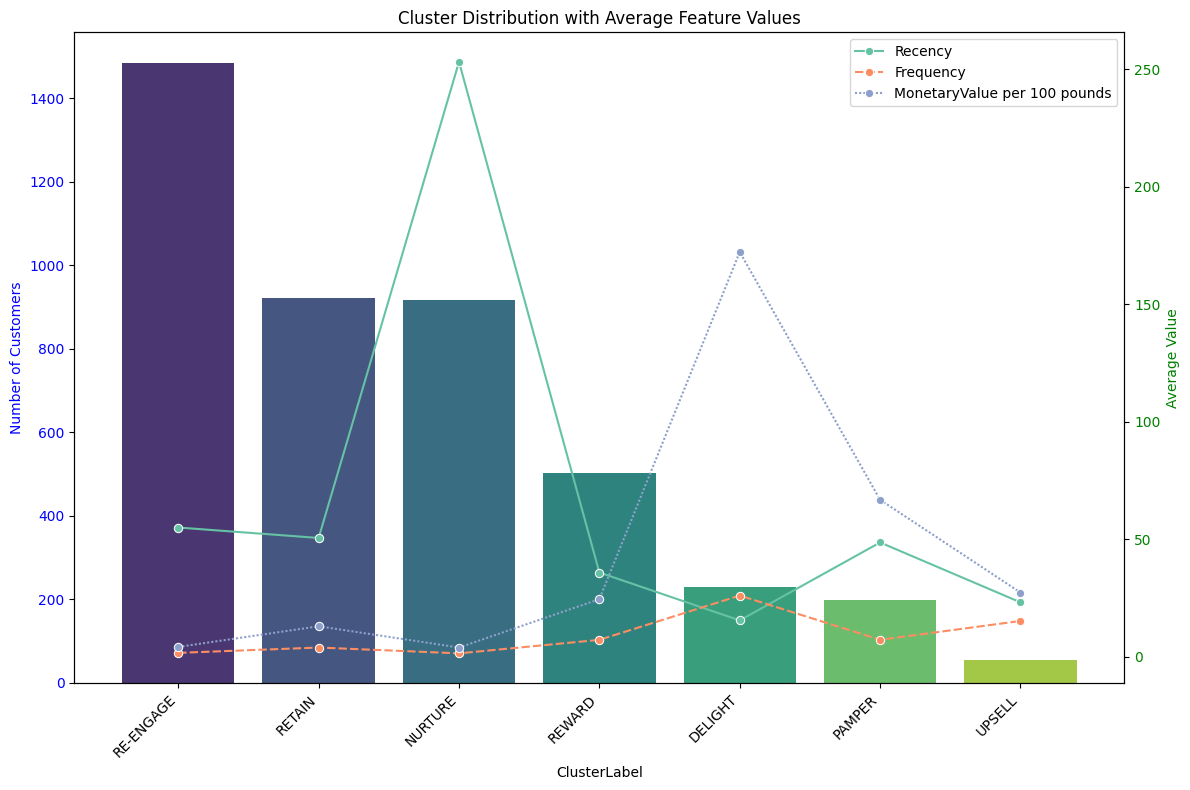

In [34]:
# Create the combined plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for cluster counts
sns.barplot(
    x=cluster_counts.index, 
    y=cluster_counts.values, 
    ax=ax1, 
    palette="viridis", 
    hue=cluster_counts.index, 
    legend=False
)
ax1.set_ylabel("Number of Customers", color="b")
ax1.set_title("Cluster Distribution with Average Feature Values")
ax1.tick_params(axis="y", labelcolor="b")

# Line plot for feature means
ax2 = ax1.twinx()
sns.lineplot(
    data=feature_means, 
    ax=ax2, 
    palette="Set2", 
    marker="o"
)
ax2.set_ylabel("Average Value", color="g")
ax2.tick_params(axis="y", labelcolor="g")

# Rotate x-axis labels for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

plt.savefig("../../reports/figures/cluster_distribution_and_feature_means.png", dpi=300)

plt.tight_layout()
plt.show()

**1. RE-ENGAGE Cluster**
- **Characteristics:**
    - Largest cluster with approximately 1300-1400 customers.
    - Moderate Recency (300-400), low Frequency (0-50), and low Monetary Value (0-50).

- **Insight:**
    - This significant customer segment is not fully engaged, as evidenced by their infrequent purchases and low spending despite moderate recent activity.

- **Action:**
    - Implement re-engagement strategies such as personalized offers, discounts, or loyalty program invitations to boost their purchase frequency and spending.

---

**2. RETAIN Cluster**
- **Characteristics:** 
    - Second-largest cluster with around 800-900 customers.
    - Moderate Recency (300-400), low Frequency (0-50), and low Monetary Value (0-50).

- **Insight:** 
    - Similar to RE-ENGAGE, these customers show low engagement despite moderate recent activity, risking churn if not addressed.

- **Action:** 
    - Focus on retention strategies like exclusive deals, targeted email campaigns, or loyalty rewards to maintain their interest and encourage more frequent purchases.

---

**3. NURTURE Cluster**
- **Characteristics:**
    - Substantial cluster with 800-900 customers.
    - High Recency (200-250), low Frequency (0-50), and low Monetary Value (0-50).

- **Insight:** 
    - These customers were recently active but have not yet become frequent or high-spending buyers, indicating early-stage potential.

- **Action:** 
    - Nurture these customers with onboarding programs, educational content (e.g., product tutorials), or introductory offers to encourage repeat purchases and higher spending.

---

**4. REWARD Cluster**
- **Characteristics:** 
    - Moderate cluster with 400-500 customers.
    - Moderate Recency (200-250), moderate Frequency (50-100), and high Monetary Value (150-200).

- **Insight:** 
    - These high-value customers spend significantly but may not purchase as often, making them a critical segment for retention.

- **Action:** 
    - Reward these customers with VIP treatment, exclusive access (e.g., early product launches), or loyalty rewards to maintain their loyalty and sustain their high spending.

---

**5. DELIGHT Cluster**
- **Characteristics:**
    - Smaller cluster with 200-300 customers.
    - Low Recency (100-150), high Frequency (100-150), and moderate Monetary Value (100-150).

- **Insight:** 
    - These frequent buyers purchase often but spend moderately per transaction, suggesting room to increase their average order value.

- **Action:** 
    - Delight these customers with personalized product recommendations, bundle offers, or incentives (e.g., free shipping on larger orders) to boost their Monetary Value.

---

**6. PAMPER Cluster**
- **Characteristics:**
    - Small cluster with 200-300 customers.
    - Low Recency (50-100), low Frequency (0-50), and low Monetary Value (50-100).

- **Insight:** 
    - This segment shows balanced but lower engagement across all metrics, indicating they are not highly active or valuable yet.

- **Action:**
    - Pamper these customers with special attention (e.g., handwritten notes), tailored experiences, or small perks to increase their engagement and spending.

---

**7. UPSELL Cluster**
- **Characteristics:**
    - Smallest cluster with 0-100 customers.
    - Low Recency (50-100), moderate Frequency (100-150), and low Monetary Value (0-50).

- **Insight:** 
    - These customers purchase moderately often but spend little, presenting an opportunity to increase their transaction value.

- **Action:** 
    - Upsell to this group with cross-selling (e.g., complementary products) or upselling strategies (e.g., premium versions) to enhance their Monetary Value while maintaining frequency.

---

**Summary of Actionable Insights**
- **RE-ENGAGE & RETAIN:** Target these large, low-engagement clusters with personalized offers and loyalty programs to increase frequency and spending.

- **NURTURE:** Support recently active customers with onboarding and educational initiatives to build loyalty and encourage repeat purchases.

- **REWARD:** Prioritize high-value customers with exclusive rewards to sustain their significant spending.

- **DELIGHT:** Enhance frequent buyers’ experience with recommendations and bundles to lift their average order value.

- **PAMPER:** Boost engagement in this smaller, less active segment with tailored attention and perks.

- **UPSELL:** Capitalize on moderate frequency with upselling and cross-selling to grow spending in this small cluster.

These tailored strategies provide a roadmap for targeted marketing and customer engagement, leveraging each cluster’s unique profile to drive business growth and maximize customer lifetime value.